In [1]:
import MulensModel as mm
import matplotlib.pyplot as plt

In [2]:
my_pspl_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133, 't_E': 61.5})
my_1S2L_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133,
     't_E': 61.5, 'rho': 0.0008, 'q': 0.009, 's': 1.120,
     'alpha': 223.8})
my_1S2L_model.set_magnification_methods([2452833., 'VBBL', 2452845.])

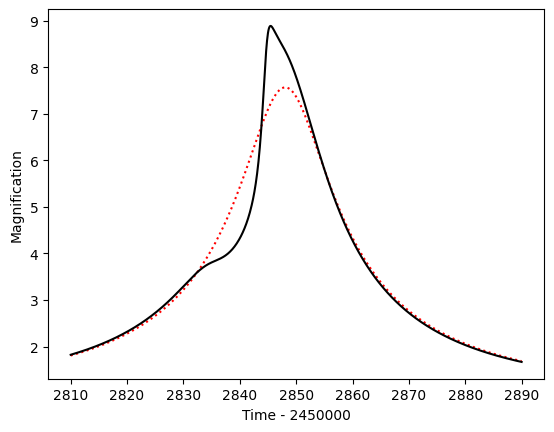

In [3]:
my_pspl_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='red', linestyle=':')
my_1S2L_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='black')
plt.show()

1000


/home/skelly/school/exoplanets/microlensing/env/lib/python3.12/site-packages/MulensModel/model.py:267: UserWarning: No blend_flux not specified. Assuming blend_flux = zero.
  warnings.warn(


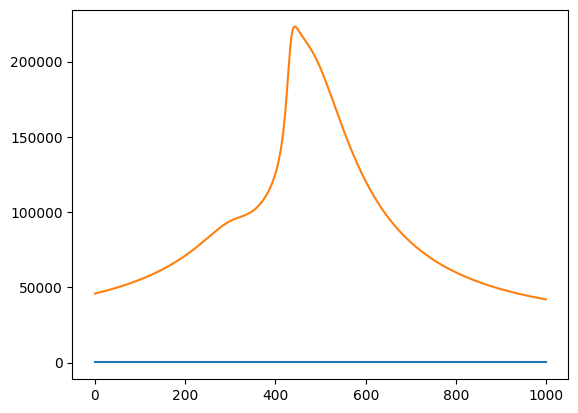

In [4]:
"""
Calculate model light curve in magnitudes.

Keywords :
    times: [*float*, *list*, *numpy.ndarray*]
        a list of times at which to plot the magnifications

    t_range, t_start, t_stop, dt, n_epochs: see :py:func:`set_times`

    source_flux: *float* or *list*
        Explicitly specify the source flux(es) in a
        system where flux = 1 corresponds to
        :obj:`MulensModel.utils.MAG_ZEROPOINT` (= 22 mag). If the model
        has n_source > 1, source_flux may be specified as a list: one
        value for each source. Alternatively, if source_flux is
        specified as a float, source_flux_ratio should also be
        specified. Then, source_flux is taken to be the flux of the
        first source, and the other source fluxes are derived using
        source_flux_ratio.

    blend_flux: *float*
        Explicitly specify the blend flux in a
        system where flux = 1 corresponds to
        :obj:`MulensModel.utils.MAG_ZEROPOINT` (= 22 mag).

    source_flux_ratio: *float*, Optional
        If the model has two sources, source_flux_ratio is the ratio of
        source_flux_2 / source_flux_1.

    gamma, bandpass:
        see :py:func:`get_magnification()`

Returns :
    magnitudes: *numpy.ndarray*
        Magnitude values for each epoch.
"""
lc = my_1S2L_model.get_lc(t_range=[2452810, 2452890], source_flux=1)
print(len(lc))
import numpy as np
plt.plot(np.arange(len(lc)), lc)

# mag to flux
# m = 22.5 – 2.5 x log10(f/fref)
# f = fref * (10 ^ (m - 22.5) / (-2.5))
# f0 = 3.64 x 10^(-23) W/m²
# Sun = mag of -26.7, flux of 1.361 * 10^3 W/m^2
flux = 10**3 * 10 ** ((lc - 25.5) / (-2.5))
plt.plot(np.arange(len(lc)), flux)

In [5]:
from astropy.io import ascii

#metadata = ascii.read('microlensing_events.ipac', format='ipac') 


In [6]:
from astropy.io import ascii
import os
from tqdm import tqdm

# Read the IPAC file
fdir = "data/lightcurves/"
directory = os.fsencode(fdir)

curves = []

i = 0
for file in tqdm(os.listdir(directory)):
    filename = os.fsdecode(file)
    curve = ascii.read(fdir + filename, format='ipac') 
    curves.append(curve)
    i+=1
    if i == 100:
        break

  2%|▏         | 99/6111 [00:14<15:03,  6.65it/s]


In [7]:
def generate_microlensing_event(sample):
    """ Generate Microlensing Event 
        {'t_0': 2452848.06, 'u_0': 0.133,
         't_E': 61.5, 'rho': 0.0008, 'q': 0.009, 's': 1.120,
         'alpha': 223.8}
     """
    my_1S2L_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133,
     't_E': 61.5, 'rho': 0.0008, 'q': 0.009, 's': 1.120,
     'alpha': 223.8})
    my_1S2L_model.set_magnification_methods([2452833., 'VBBL', 2452845.])

    lc = my_1S2L_model.get_lc(t_range=[2452810, 2452890], source_flux=1)

    # very rough magnitude to flux calcs to get in the right range, 
    # TODO: refine & check astronomical rigor
    flux = 10**3 * 10 ** ((lc - 25.5) / (-2.5))

    # interpolate to similar to a sample provided
    x_filled = np.linspace(min(sample['HJD']), max(sample['HJD']), 2 * len(sample['HJD']))

    # TODO: make these variables so you can adjust width/position
    flux_gen_interpolated = np.interp(x_filled, np.arange(len(flux))/20 + 4000, flux) - min(flux)

    return x_filled, flux_gen_interpolated

OG
Summary
Sum: 8.1E+06
Range: -3.4E+04 , 2.7E+05
Centers: 1.2E+03 4.2E+01
STD: 1.5E+04 

Generated Microlensing Event
Summary
Sum: 6.6E+06
Range: 0.0E+00 , 1.8E+05
Centers: 9.9E+02 0.0E+00
STD: 8.7E+03 

Adjusted Microlensing event
Summary
Sum: 1.5E+07
Range: -3.4E+04 , 2.7E+05
Centers: 2.2E+03 1.5E+02
STD: 1.7E+04 



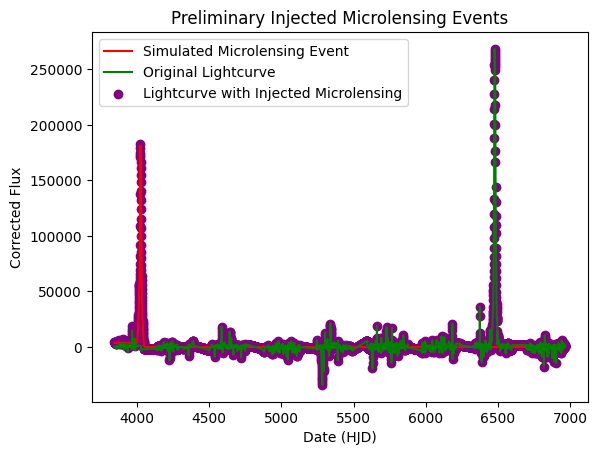

In [23]:
import numpy as np
from decimal import Decimal

sample = curves[0].copy()
#plt.plot(sample['HJD'], sample["cor_flux"], color="blue")

mask = np.isnan(sample["cor_flux"]) | (sample["cor_flux"] == 0)


sample.remove_rows(np.where([c.data for c in sample.mask.itercols()])[-1])

#sample.remove_rows(np.isnan(sample["cor_flux"]) | (sample["cor_flux"] == i))
x_filled = np.linspace(min(sample['HJD']), max(sample['HJD']), 2 * len(sample['HJD']))
sample_interpolated = np.interp(x_filled, sample['HJD'], sample['cor_flux'])
def summarize(x):
    print("Summary")
    print("Sum:", '%.1E' % Decimal(np.sum(x)))
    print("Range:", '%.1E' % Decimal(np.min(x)), ",", '%.1E' % Decimal(np.max(x)))
    print("Centers:", '%.1E' % Decimal(np.mean(x)), '%.1E' % Decimal(np.median(x)))
    print("STD:" ,'%.1E' % Decimal(np.std(x)), "\n")

flux_gen_interpolated = np.interp(x_filled, np.arange(len(flux))/20 + 4000, flux) - min(flux)

print("OG")
summarize(sample_interpolated)
print("Generated Microlensing Event")
summarize(flux_gen_interpolated)
print("Adjusted Microlensing event")
summarize(sample_interpolated + flux_gen_interpolated)

plt.plot(x_filled, flux_gen_interpolated, color="red", label="Simulated Microlensing Event") # shapes (6720,) and (1000,)
plt.plot(x_filled, sample_interpolated, color="green", label="Original Lightcurve")
plt.scatter(x_filled, sample_interpolated + flux_gen_interpolated, color="purple", label="Lightcurve with Injected Microlensing")
plt.legend()

plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")
plt.title("Preliminary Injected Microlensing Events")
plt.show()
#plt.plot(sample['HJD'], sample["cor_flux"], color="red", alpha=0.5)

Text(0.5, 1.0, 'Microlensing Event Light Curves')

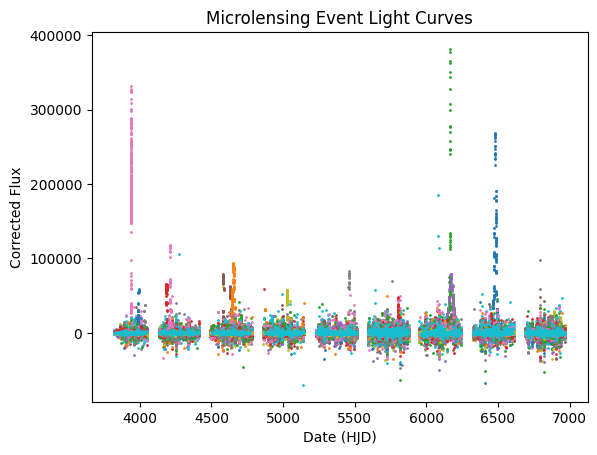

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from preprocessing import remove_nan_rows

for i, curve in enumerate(curves):
    remove_nan_rows(curves[i])
    plt.scatter(curve['HJD'], curve["cor_flux"], s=1)


plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")
plt.title("Microlensing Event Light Curves")


In [10]:
#nan check
nan_indices = np.isnan(curves[0]["cor_flux"]) 
print(nan_indices)
print(curves[0]["cor_flux"])

[False False False ... False False False]
  cor_flux  
------------
  345.646373
 -777.239933
   -6.945603
 1439.113928
    -25.7615
-1649.786382
  990.577021
 -655.362276
-1679.031324
  724.439913
         ...
 6897.048107
 1343.177947
 -233.539297
 1231.579384
-2275.596467
 -593.106536
  286.439056
 4129.768198
 -754.898778
 1531.014167
Length = 3360 rows


In [20]:

print("Curve Summary")
summarize(curves[0])

Curve Summary
Summary


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype([('HJD', '<f8'), ('flux', '<f8'), ('cor_flux', '<f8'), ('flux_err', '<f8'), ('obsID', '<i8'), ('JD', '<f8'), ('fwhm', '<f8'), ('sky', '<f8'), ('airmass', '<f8'), ('nstar', '<i8'), ('scale', '<f8'), ('exptime', '<i8'), ('skydiff', '<f8'), ('chisq', '<f8'), ('npix', '<i8'), ('airmass1', '<f8'), ('ang1', '<f8'), ('included', '<U5')]), dtype([('HJD', '<f8'), ('flux', '<f8'), ('cor_flux', '<f8'), ('flux_err', '<f8'), ('obsID', '<i8'), ('JD', '<f8'), ('fwhm', '<f8'), ('sky', '<f8'), ('airmass', '<f8'), ('nstar', '<i8'), ('scale', '<f8'), ('exptime', '<i8'), ('skydiff', '<f8'), ('chisq', '<f8'), ('npix', '<i8'), ('airmass1', '<f8'), ('ang1', '<f8'), ('included', '<U5')])) -> None